In [270]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt


In [271]:
# load numpy array from csv file
# load array
X_train_SMOTE = loadtxt('X_train_SMOTE.csv', delimiter=',')
y_train_SMOTE = loadtxt('y_train_SMOTE.csv', delimiter=',')
y_pred_SMOTE = loadtxt('y_pred_SMOTE.csv', delimiter=',')
y_test = loadtxt('y_test.csv', delimiter=',')
X_test = pd.read_csv('X_test.csv', index_col = 0)
# print the array
#print(X_train_SMOTE,y_train_SMOTE)

In [308]:
X_test_all = X_test.drop(['AgeGroup'], axis=1)
X_test_all

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
5489,98.0,98.0,98.00,98.0,98.00,98.0,98.0,46,0,98.0,98.0,-4.80,19
2500,122.0,98.0,39.28,135.0,93.67,98.0,32.0,36,1,1.0,0.0,-0.02,24
30561,68.0,96.0,98.00,160.0,90.00,62.0,15.0,53,1,98.0,98.0,0.00,21
1925,91.0,98.5,36.90,101.5,72.50,48.5,14.0,62,1,0.0,1.0,-93.26,41
32849,98.0,98.0,98.00,98.0,98.00,98.0,98.0,50,0,1.0,0.0,-6.05,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26145,127.0,94.5,38.70,86.0,70.00,60.0,5.0,58,1,0.0,1.0,-74.53,43
7717,97.0,94.0,98.00,147.0,98.00,72.0,21.0,60,0,98.0,98.0,-0.05,22
34119,76.0,100.0,36.50,88.0,80.00,77.0,17.0,60,0,98.0,98.0,-0.02,27
3206,77.0,100.0,98.00,169.0,110.33,98.0,14.0,61,0,1.0,0.0,-8.63,5


In [309]:
Counter(y_test)

Counter({0.0: 11829, 1.0: 175})

In [310]:
df_y_train = pd.DataFrame(y_train_SMOTE,columns = ['SepsisLabel'])


In [361]:
import numpy as np
import pandas as pd
  

# convert numpy array to dataframe
df_X_train = pd.DataFrame(X_train_SMOTE,columns =['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS'] )
print("\n dataframe_X_train_SMOTE: ")

df_X_train



 dataframe_X_train_SMOTE: 


In [378]:
%store df_X_train

Stored 'df_X_train' (DataFrame)


In [362]:
Female_index = df_X_train[df_X_train['Gender'] == 0].index

Male_index = df_X_train[df_X_train['Gender'] == 1].index


In [363]:
X_Train_Female = df_X_train[df_X_train['Gender'] == 0]
X_Train_MALE = df_X_train[df_X_train['Gender'] == 1]

In [364]:
y_train_male = df_y_train.iloc[Male_index]
y_train_Female = df_y_train.iloc[Female_index]

In [365]:
y_train_male

,SepsisLabel
0,0.0
2,0.0
3,0.0
4,0.0
6,0.0
...,...
55147,1.0
55148,1.0
55150,1.0
55151,1.0


In [366]:
y_train_Female

,SepsisLabel
1,0.0
5,0.0
8,0.0
10,0.0
11,0.0
...,...
55143,1.0
55144,1.0
55146,1.0
55149,1.0


In [367]:
X_Train_Female


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
1,101.000000,99.000000,36.100000,146.000000,121.000000,104.000000,20.000000,30.0,0.0,1.0,0.0,-7.810000,8.0
5,94.000000,98.000000,98.000000,120.000000,90.000000,82.000000,18.000000,34.0,0.0,98.0,98.0,-2.360000,48.0
8,69.000000,100.000000,98.000000,105.000000,62.000000,44.000000,10.000000,35.0,0.0,0.0,1.0,-210.310000,23.0
10,72.000000,95.000000,98.000000,182.000000,130.000000,112.000000,98.000000,75.0,0.0,98.0,98.0,0.000000,36.0
11,55.000000,96.000000,98.000000,120.000000,85.000000,59.000000,19.000000,81.0,0.0,98.0,98.0,-3.150000,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55143,86.493611,97.534345,37.624681,159.130392,98.000000,66.232827,22.061701,76.0,0.0,0.0,1.0,-88.545873,40.0
55144,97.481069,100.000000,98.000000,110.278397,76.670824,60.582183,18.784855,40.0,0.0,1.0,0.0,-7.451679,26.0
55146,87.763352,96.000000,98.000000,140.242726,110.479374,90.668692,25.047330,56.0,0.0,1.0,0.0,-90.510000,22.0
55149,89.216935,97.874193,37.048331,107.342742,73.845968,59.223389,16.108467,64.0,0.0,98.0,98.0,-0.971928,18.0


In [368]:
X_Train_MALE

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,100.000000,98.500000,37.500000,110.000000,70.000000,51.000000,18.0,61.0,1.0,0.000000,1.000000,-141.650000,35.0
2,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,66.0,1.0,98.000000,98.000000,-2.940000,16.0
3,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,69.0,1.0,98.000000,98.000000,-2.890000,45.0
4,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,100.0,1.0,1.000000,0.000000,-180.740000,1.0
6,71.000000,100.000000,37.400000,110.000000,72.000000,51.000000,24.0,69.0,1.0,0.000000,1.000000,-192.330000,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55147,108.985076,96.492538,36.501492,102.522387,82.985076,70.014924,25.0,79.0,1.0,1.000000,0.000000,-60.340000,10.0
55148,98.642882,98.045102,36.488724,128.706835,103.150457,76.687984,98.0,26.0,1.0,0.000000,1.000000,-6.001248,25.0
55150,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,75.0,1.0,0.126677,0.873323,-110.244767,1.0
55151,96.908068,96.266818,98.000000,128.275795,65.766818,45.150227,21.0,31.0,1.0,98.000000,98.000000,-0.020000,10.0


In [369]:
#functions to generate accuracy report
def evaluation_score (y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred) 
    print("Confusion Matrix \n", cm)
    print("Classification Report \n", classification_report(y_test,y_pred))

In [370]:
def specificity_score (y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN+FP)
    return specificity

In [371]:
def Plotting(Plots_title, Acc, Pre, Sens, Spec):
    
    plot = plt.figure()
    axes = plot.add_axes([0,0,1,1])
    metrics = ['Accuracy',  'Precision', 'Sensitivity','Specificty']
    values = [Acc, Pre, Sens, Spec]
    barlist = axes.bar(metrics,values, width=0.5)
    barlist[0].set_color('royalblue')
    barlist[1].set_color('green')
    barlist[2].set_color('orange')
    barlist[3].set_color('yellow')
    axes.set_yticks(np.arange(0, 1.25, 0.5))
    axes.set_title(Plots_title)
    def autolabel(rects):
        for idx,rect in enumerate(barlist):
            height = rect.get_height()
            axes.text(rect.get_x() + rect.get_width()/2., 1*height,
                    round(values[idx],3),
                    ha='center', va='bottom', rotation=0)

    autolabel(barlist)
    plt.show()



In [372]:
import joblib
# load
rf_model_SMOTE = joblib.load("my_random_forest.joblib")

In [373]:
y_train_SMOTE


array([0., 0., 0., ..., 1., 1., 1.])

# Model training with only male patients

## Test data set includes all the patients 

In [374]:

#Metrics packages
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score 
import warnings
from sklearn.metrics import precision_score, recall_score, make_scorer, accuracy_score

<ipython-input-375-80cf783eb393>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_SMOTE = rf_model_SMOTE.fit(X_Train_MALE,y_train_male)


Confusion Matrix 
 [[11784    45]
 [  124    51]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11829
         1.0       0.53      0.29      0.38       175

    accuracy                           0.99     12004
   macro avg       0.76      0.64      0.68     12004
weighted avg       0.98      0.99      0.98     12004



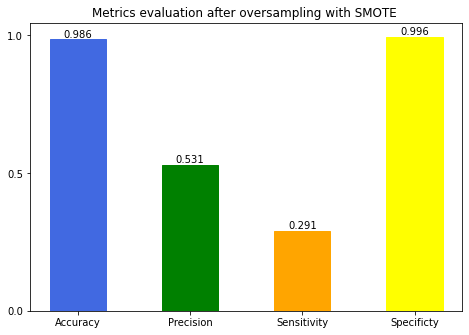

<Figure size 432x288 with 0 Axes>

In [375]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model_SMOTE = rf_model_SMOTE.fit(X_Train_MALE,y_train_male)
y_pred_SMOTE = rf_model_SMOTE.predict(X_test_all)
evaluation_score(y_test,y_pred_SMOTE)

cm_SMOTE=confusion_matrix(y_test,y_pred_SMOTE)
TN, FP, FN, TP = cm_SMOTE.ravel()
pd.crosstab(y_test, y_pred_SMOTE, rownames = ['Actual'], colnames =['Predicted'], margins = True)
Plotting("Metrics evaluation after oversampling with SMOTE ", accuracy_score(y_test,y_pred_SMOTE),precision_score(y_test,y_pred_SMOTE),recall_score(y_test,y_pred_SMOTE),specificity_score(y_test,y_pred_SMOTE)) 
plt.savefig('rf_model_with_SMOTE_Trainedwithmale.png')

In [376]:
sensitive_features = X_test[['Age','Gender']] 
sensitive_features

,Age,Gender
5489,46,0
2500,36,1
30561,53,1
1925,62,1
32849,50,0
...,...,...
26145,58,1
7717,60,0
34119,60,0
3206,61,0


In [381]:
sensitive_features['y_true'] =  y_test
sensitive_features['y_pred'] = y_pred_SMOTE

<ipython-input-381-277ca21f020f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features['y_true'] =  y_test
<ipython-input-381-277ca21f020f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features['y_pred'] = y_pred_SMOTE


In [382]:
def fairness_metrics(sensitive_features):
    """Calculate fairness for subgroup of population"""
    
    #Confusion Matrix
    cm=confusion_matrix(sensitive_features['y_true'],sensitive_features['y_pred'])
    TN, FP, FN, TP = cm.ravel()
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    PPV = TP/(TP+FP) #Positive predictive value (Precison)
    TPR = TP/(TP+FN) # True positive rate
    TNR = TN/(FP+TN) # True negative rate
    return np.array([ACC, PPV, TPR, TNR])  

In [383]:
fm_Gender_1 = fairness_metrics(sensitive_features[sensitive_features.Gender==1])
fm_Gender_0 = fairness_metrics(sensitive_features[sensitive_features.Gender==0])

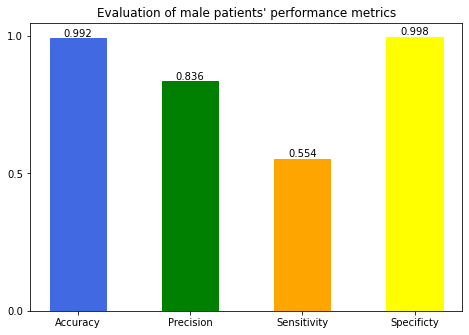

In [384]:
Plotting("Evaluation of male patients' performance metrics", fm_Gender_1[0],fm_Gender_1[1],fm_Gender_1[2],fm_Gender_1[3])
#plt.savefig('barplots for male patients while training only male.png')

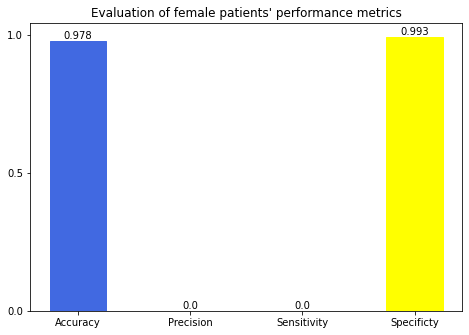

<Figure size 432x288 with 0 Axes>

In [385]:
Plotting("Evaluation of female patients' performance metrics",fm_Gender_0[0],fm_Gender_0[1],fm_Gender_0[2],fm_Gender_0[3])
plt.savefig('barplots for female patients while training only male.png')

In [386]:
def evaluation_metrics(sensitive_features):
    
    #Confusion Matrix
    cm=confusion_matrix(sensitive_features['y_true'],sensitive_features['y_pred'])
    print(cm)
    TN, FP, FN, TP = cm.ravel() 
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    PPV = TP/(TP+FP) #Positive predictive value (Precison)
    TPR = TP/(TP+FN) # True positive rate
    FPR = FP/(FP+TN) # False positive rate
    TNR = TN/(FP + TN) # True negative rate
    FNR = FN /(FN +TP) # False negative rate
    FDR = 1 - PPV # False discovery rate
    df_metrics = [{'Acc': (TP+TN)/N, 'PPV': TP/(TP+FP), 'TPR' : TP/(TP+FN), 'FPR' : FP/(FP+TN), 'TNR' : TN/(FP + TN), 'FNR' : FN /(FN +TP), 'FDR' : 1 - PPV  }]
  
    return df_metrics

In [387]:
Male = evaluation_metrics(sensitive_features[sensitive_features.Gender==1])
Female= evaluation_metrics(sensitive_features[sensitive_features.Gender==0])
data_metrics_Male = pd.DataFrame(Male, index= ['Men'])
data_metrics_Female = pd.DataFrame(Female, index= ['Women'])

[[6450   10]
 [  41   51]]
[[5334   35]
 [  83    0]]


In [388]:
pd.concat([data_metrics_Male, data_metrics_Female])

,Acc,PPV,TPR,FPR,TNR,FNR,FDR
Men,0.992216,0.836066,0.554348,0.001548,0.998452,0.445652,0.163934
Women,0.978357,0.000000,0.000000,0.006519,0.993481,1.000000,1.000000


# Model training with only Female patients

## Test data set includes all the patients 

<ipython-input-389-7adc650e7982>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_SMOTE = rf_model_SMOTE.fit(X_Train_Female,y_train_Female)


Confusion Matrix 
 [[11688   141]
 [   98    77]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11829
         1.0       0.35      0.44      0.39       175

    accuracy                           0.98     12004
   macro avg       0.67      0.71      0.69     12004
weighted avg       0.98      0.98      0.98     12004



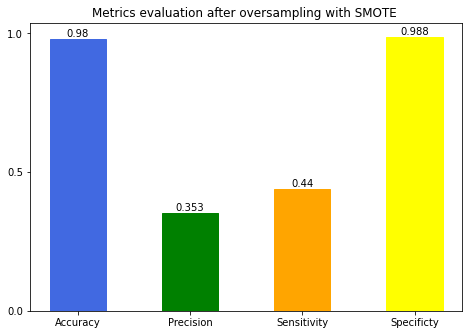

<Figure size 432x288 with 0 Axes>

In [389]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model_SMOTE = rf_model_SMOTE.fit(X_Train_Female,y_train_Female)
y_pred_SMOTE = rf_model_SMOTE.predict(X_test_all)
evaluation_score(y_test,y_pred_SMOTE)

cm_SMOTE=confusion_matrix(y_test,y_pred_SMOTE)
TN, FP, FN, TP = cm_SMOTE.ravel()
pd.crosstab(y_test, y_pred_SMOTE, rownames = ['Actual'], colnames =['Predicted'], margins = True)
Plotting("Metrics evaluation after oversampling with SMOTE ", accuracy_score(y_test,y_pred_SMOTE),precision_score(y_test,y_pred_SMOTE),recall_score(y_test,y_pred_SMOTE),specificity_score(y_test,y_pred_SMOTE)) 
plt.savefig('rf_model_with_SMOTEwhiletraining withfemale.png')

In [390]:
sensitive_features['y_true'] =  y_test
sensitive_features['y_pred'] = y_pred_SMOTE

<ipython-input-390-277ca21f020f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features['y_true'] =  y_test
<ipython-input-390-277ca21f020f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features['y_pred'] = y_pred_SMOTE


In [391]:
fm_Gender_1 = fairness_metrics(sensitive_features[sensitive_features.Gender==1])
fm_Gender_0 = fairness_metrics(sensitive_features[sensitive_features.Gender==0])

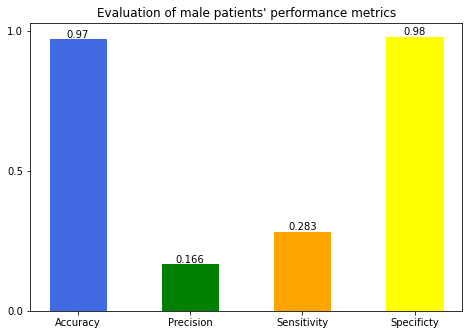

<Figure size 432x288 with 0 Axes>

In [392]:
Plotting("Evaluation of male patients' performance metrics", fm_Gender_1[0],fm_Gender_1[1],fm_Gender_1[2],fm_Gender_1[3])
plt.savefig('barplots for male patients while training only female.png')

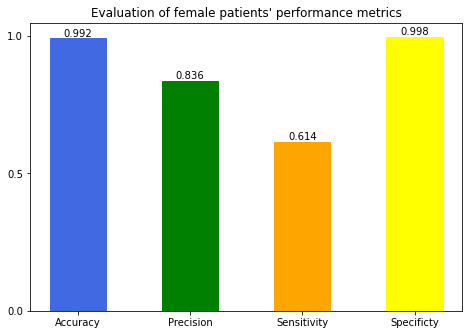

<Figure size 432x288 with 0 Axes>

In [393]:
Plotting("Evaluation of female patients' performance metrics",fm_Gender_0[0],fm_Gender_0[1],fm_Gender_0[2],fm_Gender_0[3])
plt.savefig('barplots for female patients while training only female.png')

In [394]:
Male = evaluation_metrics(sensitive_features[sensitive_features.Gender==1])
Female= evaluation_metrics(sensitive_features[sensitive_features.Gender==0])
data_metrics_Male = pd.DataFrame(Male, index= ['Men'])
data_metrics_Female = pd.DataFrame(Female, index= ['Women'])

[[6329  131]
 [  66   26]]
[[5359   10]
 [  32   51]]


In [395]:
pd.concat([data_metrics_Male, data_metrics_Female])

,Acc,PPV,TPR,FPR,TNR,FNR,FDR
Men,0.969933,0.165605,0.282609,0.020279,0.979721,0.717391,0.834395
Women,0.992296,0.836066,0.614458,0.001863,0.998137,0.385542,0.163934
